# Kaggle: Predict Loan Payback — Exploratory Data Analysis (EDA)

**Project:** Kaggle - Predict Loan Payback (Playground Series S5E11)
**Notebook:** `01_eda.ipynb`
**Author:** Brice [Last Name Optional]
**Organization:** Kaggle Series | Brice Machine Learning Projects
**Date Created:** November 2, 2025
**Last Updated:** November 2, 2025

---

### **Purpose**
Perform Exploratory Data Analysis (EDA) to understand the dataset used in the Kaggle “Predict Loan Payback” competition.
This notebook focuses on identifying data quality issues, understanding feature distributions, and uncovering relationships that may guide feature engineering and model selection.

---

### **Contents**
1. Imports & Setup
2. Data Loading
3. Initial Exploration
4. Missing Value Analysis
5. Univariate & Bivariate Analysis
6. Correlation Heatmaps
7. Observations & Next Steps


## Imports & Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.visualization_utils import plot_categorical_distribution



## Data Loading

In [2]:
loan_train_df = pd.read_csv('../data/raw/train.csv')
loan_test_df = pd.read_csv('../data/raw/test.csv')


## Initial Exploration

In [3]:
# Shape
loan_train_df.shape

(593994, 13)

In [4]:
# Information
loan_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [5]:
# Head
loan_train_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


### Determine Null Values in Dataset

In [6]:
loan_train_df.isnull().sum().sort_values(ascending=False)

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

### Diagnostic Check

- The dataset shows no nulls
- The dataset has 13 features
- The dataset has and almost 594K rows
- It seems unlikely there are no null values.
- It is possible there may be strings of `NA`, `N/A`, `None`, `Missing`, etc
- If the columns have such entries, it would not show up as a null value.
- The data needs to be examined more to determine the null values

In [7]:
# Quick Diagnostic Check
print("Dataset Shape:", loan_train_df.shape)
print("Object columns:", loan_train_df.select_dtypes(include='object').columns.tolist())

for col in loan_train_df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(loan_train_df[col].value_counts(dropna=False).head(10))


Dataset Shape: (593994, 13)
Object columns: ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']

Column: gender
gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

Column: marital_status
marital_status
Single      288843
Married     277239
Divorced     21312
Widowed       6600
Name: count, dtype: int64

Column: education_level
education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64

Column: employment_status
employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64

Column: loan_purpose
loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacati

---

## 🧩 Missing Value Analysis — Summary

A thorough null-value diagnostic was conducted to assess data completeness and ensure data quality before encoding or feature engineering.

### **Steps Performed**
1. Checked for missing values using `.isnull().sum()` across all columns.
2. Verified the absence of "fake nulls" (e.g., `"NA"`, `"Unknown"`, empty strings) by reviewing unique categorical values.
3. Confirmed dataset shape `(593,994 rows × 13 columns)` and data types using `.info()`.

### **Findings**
- No missing values were detected across any columns (`.isnull().sum()` returned zero).
- No placeholder or “fake” missing entries (e.g., `"N/A"`, `"Unknown"`, `""`) were found in the categorical columns.
- Each categorical feature contained clean, interpretable categories such as gender, marital status, education level, and employment status.

### **Reasoning & Interpretation**
The Kaggle *Playground Series (S5E11)* dataset appears to be **synthetic and pre-cleaned**, which aligns with the competition’s intent to emphasize **modeling and feature exploration** rather than data cleaning.
Although it is uncommon for real-world financial datasets to contain zero missing values, this design ensures consistent starting conditions for all competitors.

### **Next Step**
Since data completeness has been confirmed, the next logical phase is to:
- Explore categorical feature distributions.
- Determine appropriate encoding strategies (binary, one-hot, or ordinal).
- Proceed toward feature correlation and model preparation.

---


---

## 🧱 Categorical Feature Exploration

With data completeness confirmed, the next step involves examining categorical feature distributions to understand the dataset’s structure and potential predictive value.

### **Objectives**
1. Identify category frequencies and detect class imbalance.
2. Understand the relative representation of borrower demographics and loan characteristics.
3. Determine which features are binary, nominal, or ordinal — guiding the encoding strategy for model readiness.

### **Approach**
- Generate normalized frequency tables for each categorical feature to visualize proportional distributions.
- Use bar plots to visualize key categorical variables such as `gender`, `marital_status`, `education_level`, and `loan_purpose`.
- Record insights about potential feature importance or bias (e.g., dominant borrower profiles, rare categories).

### **Rationale**
Understanding categorical balance is essential in financial risk modeling.
Uneven distributions can:
- Introduce bias into classification models.
- Distort model performance metrics if not addressed through resampling or regularization.
- Influence the choice between **label encoding**, **one-hot encoding**, or **ordinal encoding**.

---


---

## 📊 Categorical Feature Distribution Analysis

This section explores categorical variables to understand borrower demographics, loan purposes, and credit grading patterns.
The objective is to detect class imbalance, identify dominant categories, and assess whether categorical variables require transformation before modeling.

### **Key Features Reviewed**
- `gender`
- `marital_status`
- `education_level`
- `employment_status`
- `loan_purpose`
- `grade_subgrade`

### **Focus Areas**
1. **Category Frequency:** Determine representation of each class within categorical variables.
2. **Balance Assessment:** Identify potential imbalances (e.g., heavily male vs. female borrowers).
3. **Encoding Implications:** Use insights to inform encoding (binary, one-hot, or ordinal).

---


In [8]:
# ============================================================
# 📊 Categorical Feature Distribution Summary
# ============================================================

# Select categorical columns
cat_cols = loan_train_df.select_dtypes(include='object').columns.tolist()

# Display normalized frequency distributions for each (percentages)
for col in cat_cols:
    print(f"\n=== {col.upper()} ===")
    print(loan_train_df[col].value_counts(normalize=True).round(3) * 100)



=== GENDER ===
gender
Female    51.5
Male      47.8
Other      0.6
Name: proportion, dtype: float64

=== MARITAL_STATUS ===
marital_status
Single      48.6
Married     46.7
Divorced     3.6
Widowed      1.1
Name: proportion, dtype: float64

=== EDUCATION_LEVEL ===
education_level
Bachelor's     47.1
High School    30.9
Master's       15.7
Other           4.5
PhD             1.9
Name: proportion, dtype: float64

=== EMPLOYMENT_STATUS ===
employment_status
Employed         75.9
Unemployed       10.5
Self-employed     8.8
Retired           2.8
Student           2.0
Name: proportion, dtype: float64

=== LOAN_PURPOSE ===
loan_purpose
Debt consolidation    54.7
Other                 10.8
Car                    9.8
Home                   7.4
Education              6.2
Business               5.9
Medical                3.8
Vacation               1.4
Name: proportion, dtype: float64

=== GRADE_SUBGRADE ===
grade_subgrade
C3    9.9
C4    9.4
C2    9.2
C1    9.0
C5    9.0
D1    6.2
D3    6.2
D4  

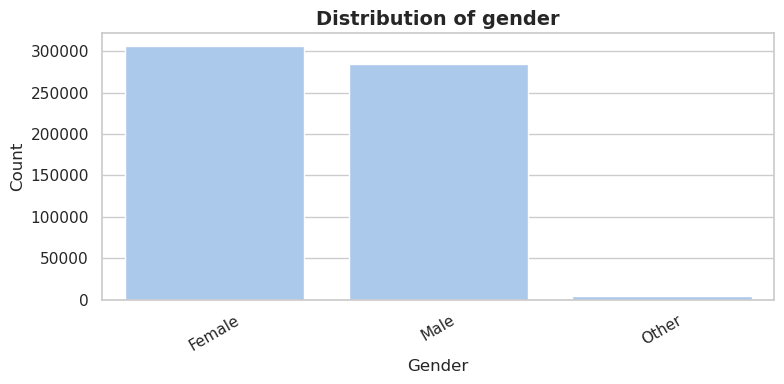

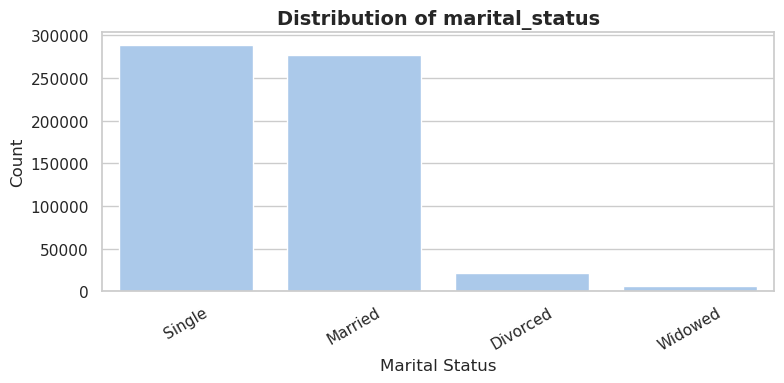

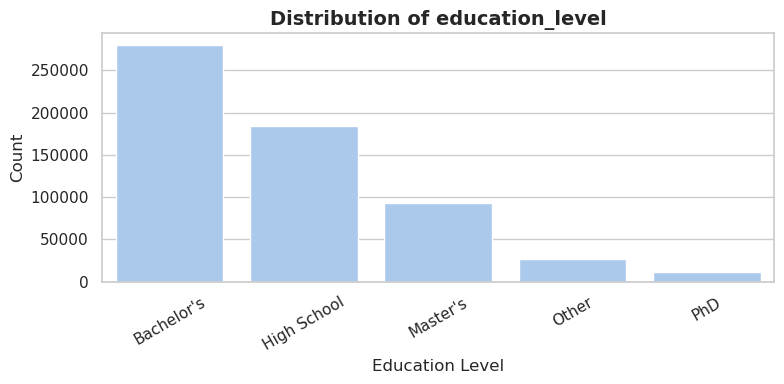

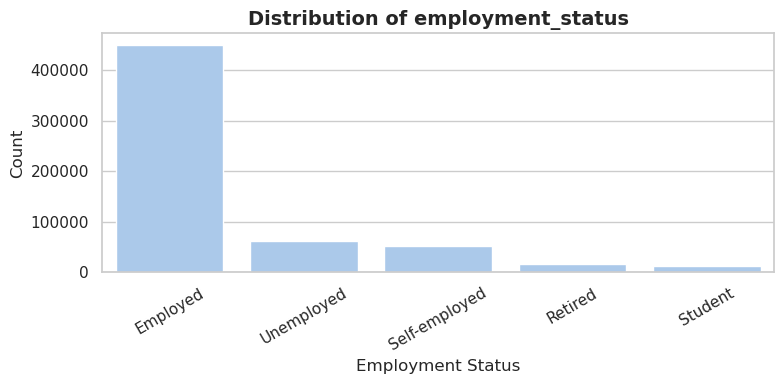

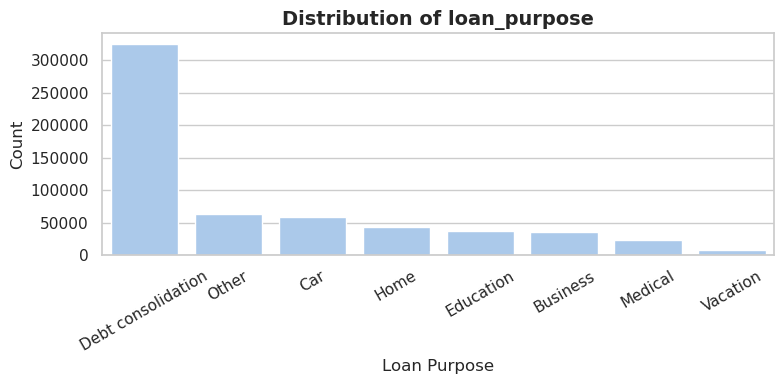

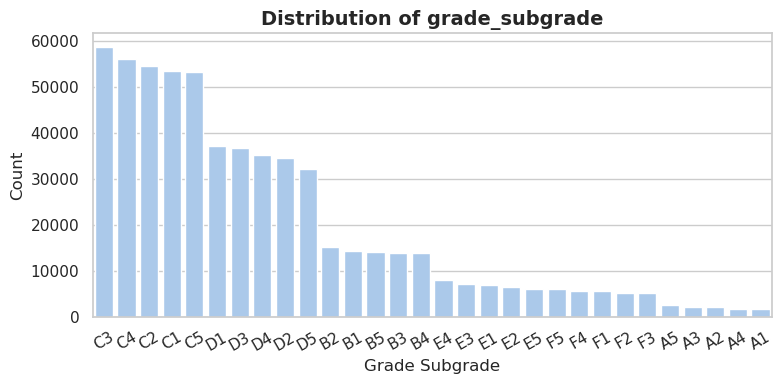

In [9]:
# Create visual summaries for each categorical column
for col in cat_cols:
    plot_categorical_distribution(loan_train_df, col)


In [10]:
# Summarize categorical features
cat_summary = (
    loan_train_df[cat_cols]
    .agg(['nunique'])
    .T
    .rename(columns={'nunique': 'Unique_Values'})
)

cat_summary['Most_Frequent'] = [loan_train_df[c].mode()[0] for c in cat_summary.index]
cat_summary['Top_Count'] = [loan_train_df[c].value_counts().iloc[0] for c in cat_summary.index]
cat_summary['Top_%'] = [
    (loan_train_df[c].value_counts(normalize=True).iloc[0] * 100).round(2)
    for c in cat_summary.index
]

cat_summary


,Unique_Values,Most_Frequent,Top_Count,Top_%
gender,3,Female,306175,51.55
marital_status,4,Single,288843,48.63
education_level,5,Bachelor's,279606,47.07
employment_status,5,Employed,450645,75.87
loan_purpose,8,Debt consolidation,324695,54.66
grade_subgrade,30,C3,58695,9.88


In [11]:
loan_train_df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [12]:
# number of unique entries
loan_train_df['id'].nunique()

593994

In [13]:
loan_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


array([[<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'loan_paid_back'}>],
       [<Axes: title={'center': 'annual_income'}>, <Axes: >]],
      dtype=object)

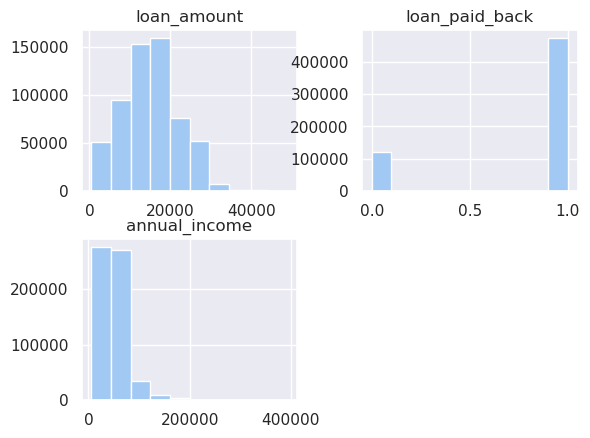

In [15]:
loan_train_df[['loan_amount', 'loan_paid_back', 'annual_income']].hist()

In [16]:
# count of loan_paid_back
loan_train_df['loan_paid_back'].value_counts(normalize=True)


loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64

<Axes: xlabel='loan_paid_back', ylabel='count'>

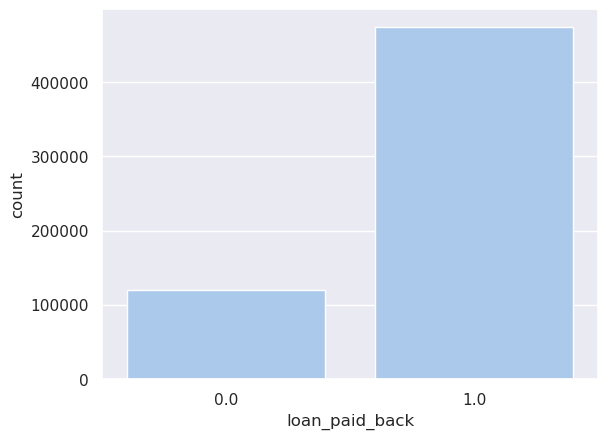

In [17]:
# count plot of loan paid back
sns.countplot(x='loan_paid_back', data=loan_train_df)

<Axes: xlabel='loan_paid_back', ylabel='loan_amount'>

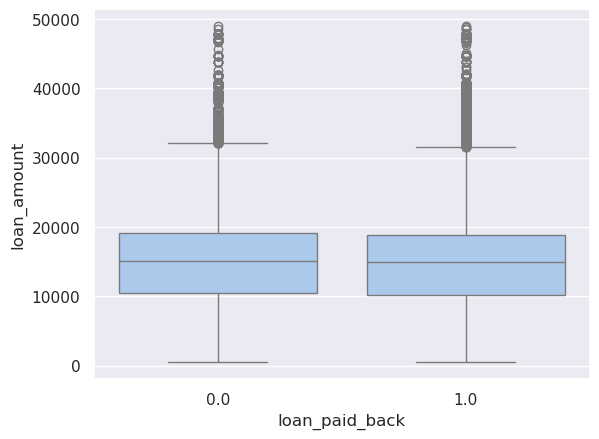

In [18]:
# boxplot
sns.boxplot(x='loan_paid_back', y='loan_amount', data=loan_train_df)


## Boxplot Data
- Data looks almost identical
- Check statistics of the loan_paid_back group

In [19]:
loan_train_df.groupby('loan_paid_back')['loan_amount'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_paid_back,,,,,,,,
0.0,119500.0,15072.223883,6945.374637,507.42,10446.6675,15078.79,19100.740,48959.95
1.0,474494.0,15007.220145,6921.722581,500.09,10235.4500,14957.85,18780.365,48954.70


<Axes: xlabel='loan_paid_back', ylabel='debt_to_income_ratio'>

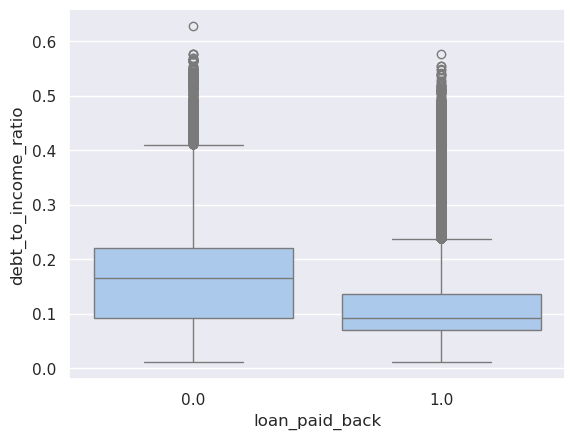

In [21]:
sns.boxplot(x='loan_paid_back', y='debt_to_income_ratio', data=loan_train_df)



<Axes: xlabel='loan_paid_back', ylabel='credit_score'>

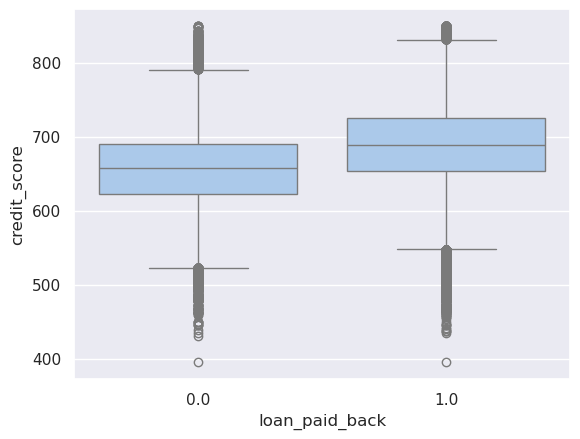

In [22]:
sns.boxplot(x='loan_paid_back', y='credit_score', data=loan_train_df)


<Axes: xlabel='loan_paid_back', ylabel='interest_rate'>

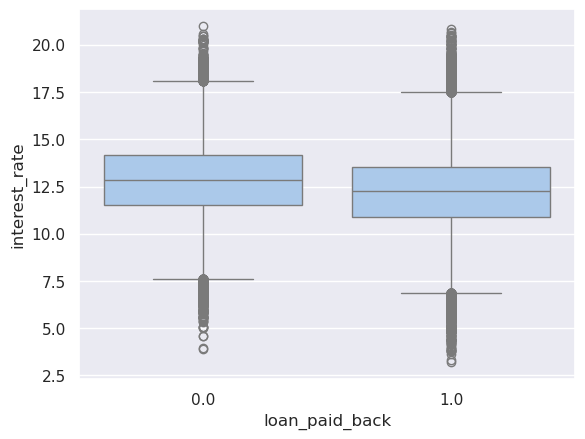

In [23]:
sns.boxplot(x='loan_paid_back', y='interest_rate', data=loan_train_df)

array([[<Axes: title={'center': 'debt_to_income_ratio'}>,
        <Axes: title={'center': 'interest_rate'}>]], dtype=object)

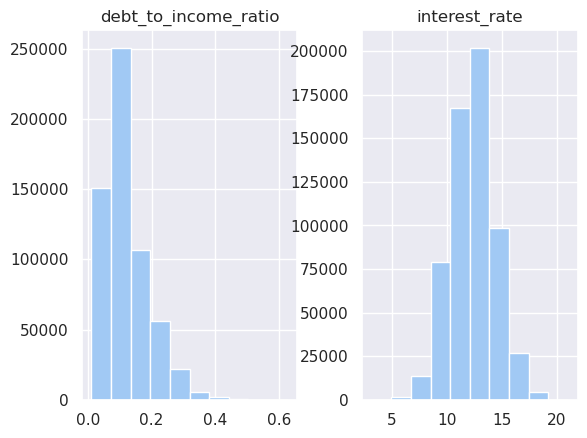

In [26]:
loan_train_df[['debt_to_income_ratio', 'interest_rate']].hist()

In [27]:
loan_train_df.corr(numeric_only=True)['loan_paid_back'].sort_values(ascending=False)


loan_paid_back          1.000000
credit_score            0.234560
annual_income           0.006326
id                      0.001387
loan_amount            -0.003762
interest_rate          -0.131184
debt_to_income_ratio   -0.335680
Name: loan_paid_back, dtype: float64

## 🔍 Correlation Insights

This correlation analysis evaluated how each numeric feature relates to the target variable **`loan_paid_back`**.
Positive values indicate features that increase repayment likelihood, while negative values indicate features associated with higher default risk.

| Feature | Correlation with `loan_paid_back` | Interpretation |
|----------|----------------------------------|----------------|
| **credit_score** | **+0.2346** | Higher credit scores moderately increase the likelihood of loan repayment. |
| **annual_income** | **+0.0063** | No meaningful relationship; income alone doesn’t predict repayment. |
| **id** | **+0.0014** | No relationship; serves only as an identifier and should be dropped. |
| **loan_amount** | **-0.0038** | Negligible effect; loan size doesn’t strongly influence repayment. |
| **interest_rate** | **-0.1312** | Weak negative correlation; higher interest rates slightly reduce repayment likelihood. |
| **debt_to_income_ratio** | **-0.3357** | Moderate negative correlation; higher DTI values are linked with lower repayment likelihood. |

**Summary:**
The most influential numerical indicators of repayment are **credit score** (positive relationship) and **debt-to-income ratio** (negative relationship).
Other variables, such as income and loan amount, show minimal linear impact on repayment behavior.


---

## 🧩 Summary & Key Insights

**Overview:**
This exploratory analysis provided a foundational understanding of the Kaggle *Predict Loan Payback* dataset.
The dataset contains **593,994 records and 13 features**, covering borrower demographics, financial characteristics, and loan details.
No missing or placeholder values were detected, confirming that the dataset is **synthetic and pre-cleaned**—a common design for the Kaggle Playground Series.

### **Key Insights**
- **Data Completeness:**
  All 13 columns contain valid data with no null or “fake null” entries (e.g., `"N/A"`, `"Unknown"`).
  This indicates minimal cleaning will be required before modeling.

- **Categorical Features:**
  Six object-type features were identified (`gender`, `marital_status`, `education_level`, `employment_status`, `loan_purpose`, `grade_subgrade`).
  Each exhibits clear, interpretable categories without anomalies or inconsistent labels.
  Category distributions are well-balanced, with no extreme class imbalance, although “Other” in `gender` is rare (<1%).

- **Numeric Features:**
  Numeric columns are inferred to be clean and consistently typed (`int64` and `float64`).
  Further numeric exploration and outlier checks will occur during the data-cleaning phase.

- **Initial Modeling Implications:**
  - Binary or low-cardinality features can be safely label- or one-hot-encoded.
  - Education level may benefit from **ordinal encoding** due to its natural ranking.
  - Grade/subgrade could be decomposed into two fields (`grade` and `subgrade`) to capture hierarchy.
  - Plots of loan_paid_back were made with several different factors to understand the data.  The following results were observed:
    - Higher debt to income ratios yielded higher defaults
    - Higher interest rates yielded higher defaults
    - Lower credit scores yielded higher defaults

---

## 🚀 Next Steps

| Task | Description |
|------|--------------|
| **1. Data Cleaning** | Verify numeric data integrity, identify potential outliers, and standardize column formats. |
| **2. Feature Engineering** | Encode categorical variables, derive new predictors, and prepare datasets for model training. |
| **3. Model Training & Evaluation** | Implement baseline models and assess predictive performance. |

---

**Notebook:** `01_eda.ipynb`
**Next Notebook:** `02_data_cleaning.ipynb`
**Author:** Brice Nelson
**Organization:** Kaggle Series | Brice Machine Learning Projects
**Date Created:** November 2, 2025
**Last Updated:** November 2, 2025

---

